In [105]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

from find_walking_frames import find_walking_data
from pre_process import conv_acceleration, find_period_acf

directory = 'data/'

subject_num = '1'

In [106]:
sub_walks = find_walking_data(subject_num, directory)

walk_df = sub_walks['01_05'][1][['acc_rt_x','acc_rt_y','acc_rt_z','acc_lt_x','acc_lt_y','acc_lt_z']]

df_accel = pd.DataFrame(None)

for column in walk_df.columns:
    df_accel[column] = walk_df[column].apply(conv_acceleration)

df_accel = df_accel[200:(-1 - 200)]

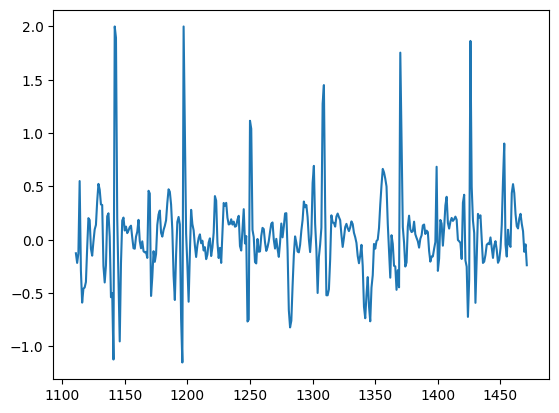

In [107]:
plt.plot(df_accel['acc_rt_y'])

In [108]:
period = find_period_acf(df_accel['acc_rt_y'], 150)

In [133]:
# Find location of maximum of the first 1.75 periods

max_idx = np.argmax(df_accel['acc_rt_y'][0:7*period//4])

df_accel_4p = df_accel[max_idx:max_idx + 4*period]

four_period_rt_y = np.array(df_accel_4p['acc_rt_y'])

four_period_rt_y

array([ 1.99993896e+00,  1.89453125e+00,  2.02148438e-01, -3.98925781e-01,
       -9.54101562e-01, -2.20703125e-01,  1.79199219e-01,  2.07519531e-01,
        8.59375000e-02,  1.23046875e-01,  6.15234375e-02,  8.59375000e-02,
        1.18164062e-01,  1.31347656e-01,  1.80664062e-02, -8.00781250e-02,
       -8.49609375e-02,  2.83203125e-02,  7.47070312e-02,  1.86035156e-01,
       -1.36718750e-02, -8.10546875e-02, -1.56250000e-02, -1.08398438e-01,
       -1.19140625e-01, -1.13769531e-01, -1.70898438e-01,  4.58984375e-01,
        4.33105469e-01, -5.27832031e-01, -3.52050781e-01, -1.07910156e-01,
       -2.07519531e-01, -1.34277344e-01,  1.38671875e-01,  2.36816406e-01,
        2.73437500e-01,  6.44531250e-02,  2.88085938e-02,  9.13085938e-02,
        1.29394531e-01,  1.82128906e-01,  3.46191406e-01,  4.72656250e-01,
        4.49218750e-01,  3.30078125e-01,  8.78906250e-02, -3.36914062e-01,
       -5.65429688e-01, -1.37207031e-01,  1.66503906e-01,  2.13378906e-01,
        1.43066406e-01, -

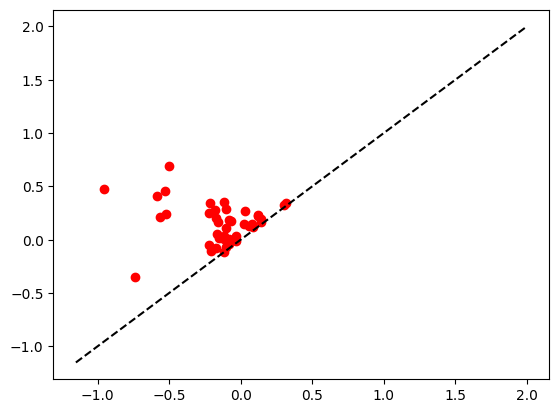

In [134]:
from teaspoon.TDA.SLSP import Persistence0D

feature_ind1, feature_ind_2, persistenceDgm = Persistence0D(four_period_rt_y)

# Persistence0D outputs the intervals in ascending length order, so in order to drop the four largest, we can just take a slice D[0:-4]
R = persistenceDgm[:-4]

plt.plot(R.T[0], R.T[1], 'ro')
plt.plot([min(four_period_rt_y),max(four_period_rt_y)],[min(four_period_rt_y),max(four_period_rt_y)], 'k--')

In [135]:
# Find location of maximum of the first 1.75 periods

max_idx = np.argmax(df_accel['acc_lt_y'][0:7*period//4])

df_accel_4p = df_accel[max_idx:max_idx + 4*period]

four_period_lt_y = np.array(df_accel_4p['acc_lt_y'])

four_period_lt_y

array([ 0.99560547, -0.96826172, -0.68603516,  0.67675781,  0.28759766,
        0.05810547,  0.22363281, -0.02294922,  0.02099609,  0.09960938,
        0.06347656,  0.08935547,  0.15771484,  0.19775391,  0.16503906,
        0.08544922,  0.14648438,  0.10009766,  0.109375  ,  0.12597656,
        0.05322266, -0.02001953,  0.0625    ,  0.11230469,  0.01025391,
       -0.05029297, -0.13525391, -0.29589844, -0.65332031, -0.61279297,
        0.4921875 ,  0.64794922,  0.37792969,  0.34033203,  0.02880859,
       -0.15234375, -0.20605469, -0.06982422,  0.015625  ,  0.16699219,
        0.15429688,  0.07080078, -0.05810547, -0.03857422,  0.04150391,
        0.09814453,  0.08496094,  0.06347656,  0.01611328,  0.14111328,
       -0.31835938, -0.49316406, -0.65087891,  0.19433594, -0.21289062,
       -0.48779297,  0.3046875 ,  0.44189453, -0.05322266,  0.10888672,
        0.01171875,  0.05712891,  0.08056641, -0.02001953, -0.05664062,
       -0.06005859, -0.01953125,  0.05908203,  0.10107422,  0.08

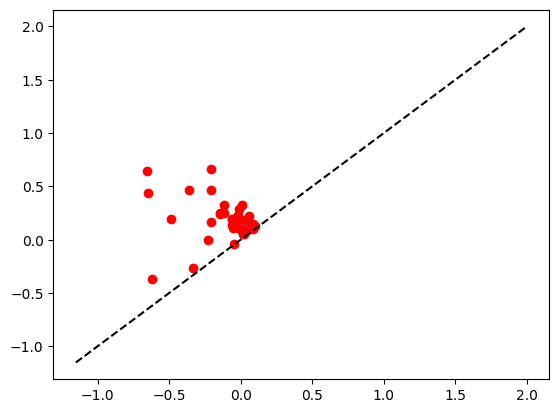

In [136]:
feature_ind1, feature_ind_2, persistenceDgm = Persistence0D(four_period_lt_y)

# Persistence0D outputs the intervals in ascending length order, so in order to drop the four largest, we can just take a slice D[0:-4]
L = persistenceDgm[:-4]

plt.plot(L.T[0], L.T[1], 'ro')
plt.plot([min(four_period_rt_y),max(four_period_rt_y)],[min(four_period_rt_y),max(four_period_rt_y)], 'k--')

(0.30078125,
 array([[ 0.00000000e+00, -1.00000000e+00,  2.68554688e-03],
        [ 1.00000000e+00,  1.20000000e+01,  2.87597656e-01],
        [ 2.00000000e+00,  7.00000000e+00,  9.17968750e-02],
        [ 3.00000000e+00,  1.10000000e+01,  2.48046875e-01],
        [ 4.00000000e+00,  6.00000000e+00,  1.07910156e-01],
        [ 5.00000000e+00,  2.50000000e+01,  2.62695312e-01],
        [ 6.00000000e+00,  8.00000000e+00,  2.34375000e-02],
        [ 7.00000000e+00,  3.00000000e+00,  1.08886719e-01],
        [ 8.00000000e+00,  1.80000000e+01,  1.52343750e-01],
        [ 9.00000000e+00,  1.40000000e+01,  2.02148438e-01],
        [ 1.00000000e+01,  2.90000000e+01,  2.86621094e-01],
        [ 1.10000000e+01,  0.00000000e+00,  7.66601562e-02],
        [ 1.20000000e+01,  1.90000000e+01,  1.19628906e-01],
        [ 1.30000000e+01,  5.00000000e+00,  9.61914062e-02],
        [ 1.40000000e+01,  2.40000000e+01,  2.69531250e-01],
        [ 1.50000000e+01,  9.00000000e+00,  1.54785156e-01],
        [ 1

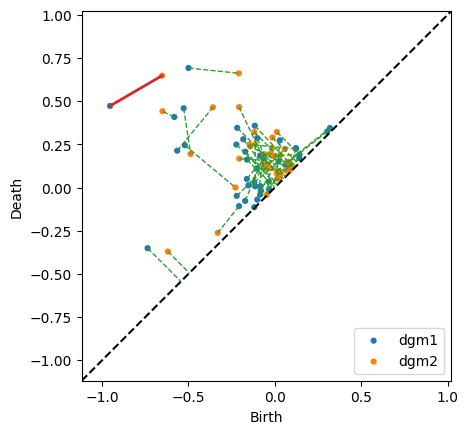

In [137]:
from teaspoon.TDA.Distance import bottleneckDist

bottleneckDist(R,L)

